<a href="https://colab.research.google.com/github/WangariSly/jobs-in-data-analysis/blob/main/analysis_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from google.colab import files
uploaded = files.upload() # Manually upload 'jobs_in_data.csv'

Saving jobs_in_data.csv to jobs_in_data (1).csv


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:

df = pd.read_csv("jobs_in_data.csv")#loading the data set

In [19]:

df.head()# Display first 5 rows


,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [21]:

df.describe()  # Summary statistics for numerical columns

,work_year,salary,salary_in_usd
count,9355.000000,9355.000000,9355.000000
mean,2022.760449,149927.981293,150299.495564
std,0.519470,63608.835387,63177.372024
min,2020.000000,14000.000000,15000.000000
25%,2023.000000,105200.000000,105700.000000
50%,2023.000000,143860.000000,143000.000000
75%,2023.000000,187000.000000,186723.000000
max,2023.000000,450000.000000,450000.000000


In [22]:

df.isnull().sum()  # Check missing values

,0
work_year,0
job_title,0
job_category,0
salary_currency,0
salary,0
salary_in_usd,0
employee_residence,0
experience_level,0
employment_type,0
work_setting,0


In [27]:
df.shape

(9355, 12)

In [31]:
df["job_title"].value_counts()#count of jobs by title

,count
job_title,
Data Engineer,2195
Data Scientist,1989
Data Analyst,1388
Machine Learning Engineer,991
Applied Scientist,272
...,...
Consultant Data Engineer,1
Sales Data Analyst,1
Managing Director Data Science,1


In [33]:
df["company_location"].value_counts()#count of job locations

,count
company_location,
United States,8132
United Kingdom,449
Canada,226
Spain,113
Germany,72
...,...
Gibraltar,1
Ecuador,1
Andorra,1


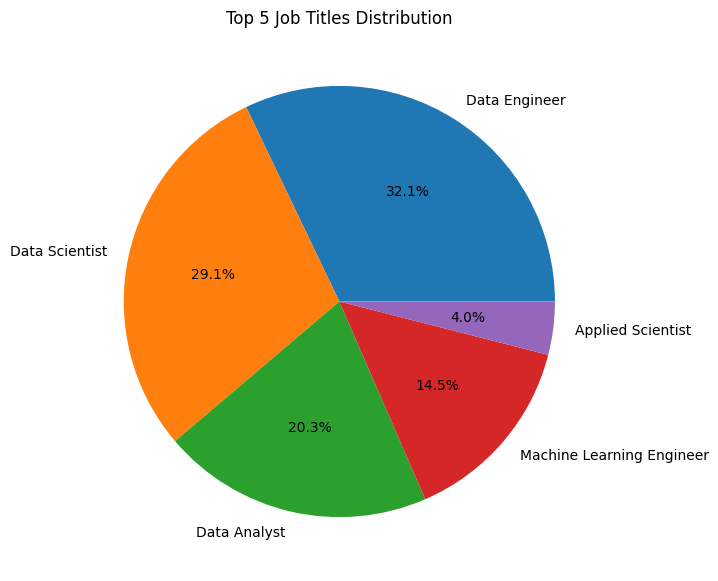

In [34]:
# piechart, job distribution by title
df["job_title"].value_counts().nlargest(5).plot.pie(autopct="%1.1f%%", figsize=(7, 7))
plt.title("Top 5 Job Titles Distribution")
plt.ylabel("")  # Hide y-label
plt.show()

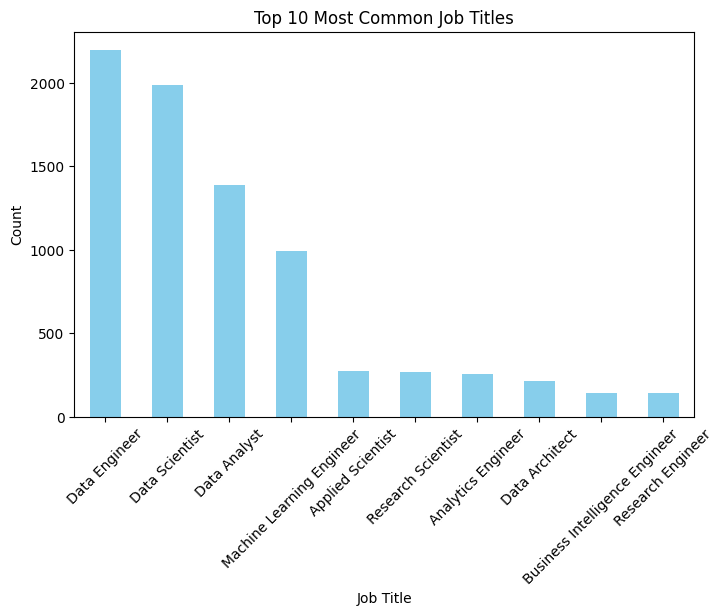

In [36]:
#barchart, top 10 jobs titles
plt.figure(figsize=(10, 5))
df["job_title"].value_counts().nlargest(10).plot(kind="bar", color="skyblue")
plt.title("Top 10 Most Common Job Titles")
plt.xlabel("Job Title")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate labels for better visibility
plt.show()

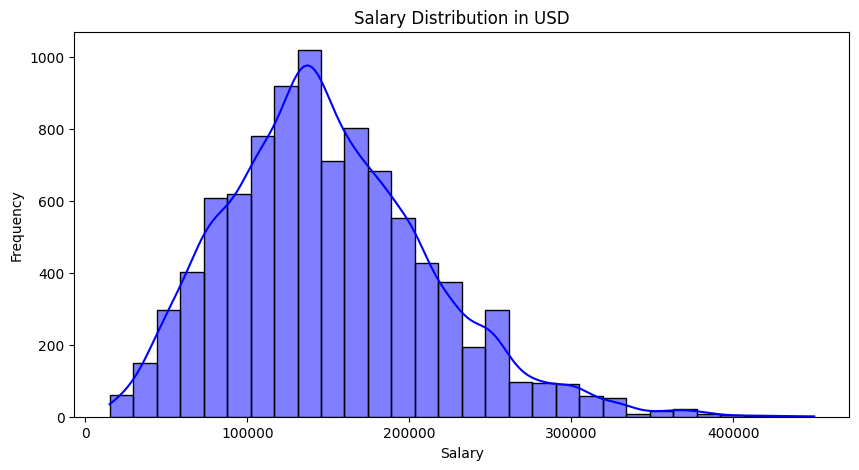

In [37]:
#salary distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["salary_in_usd"], bins=30, kde=True, color="blue")
plt.title("Salary Distribution in USD")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

**Salary by Job Title**

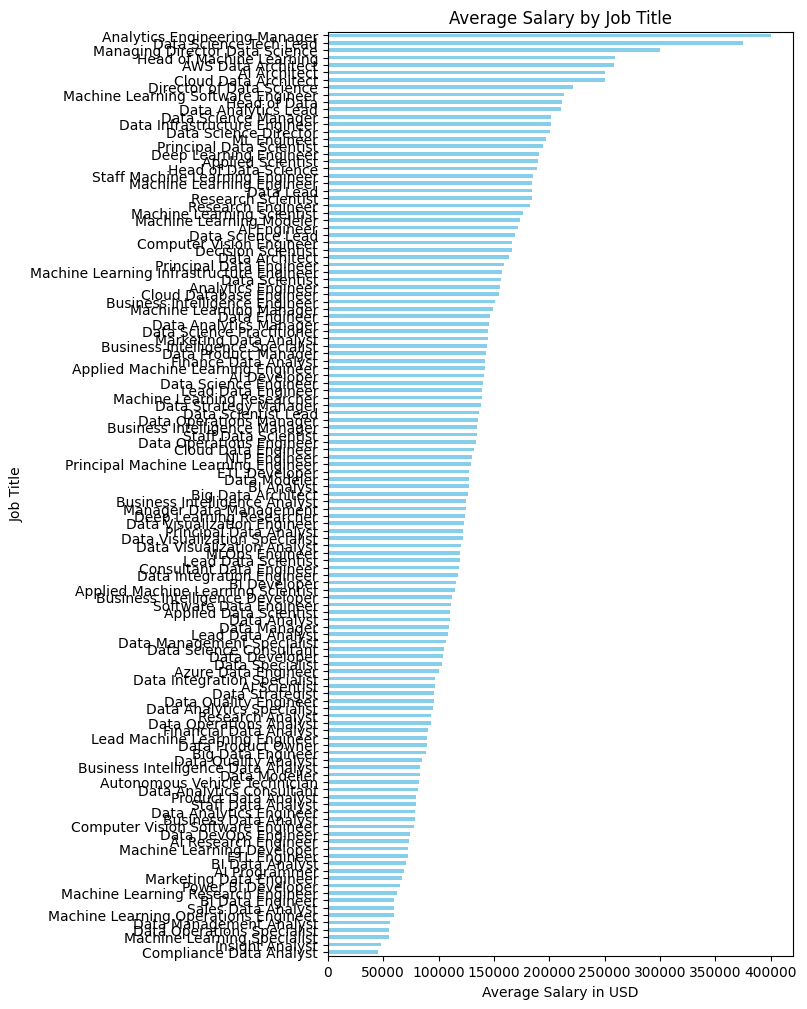

In [47]:
#average salary per job title
plt.figure(figsize=(6, 12))
df.groupby("job_title")["salary_in_usd"].mean().sort_values().plot(kind="barh", color="skyblue")
plt.xlabel("Average Salary in USD")
plt.ylabel("Job Title")
plt.title("Average Salary by Job Title")
plt.show()

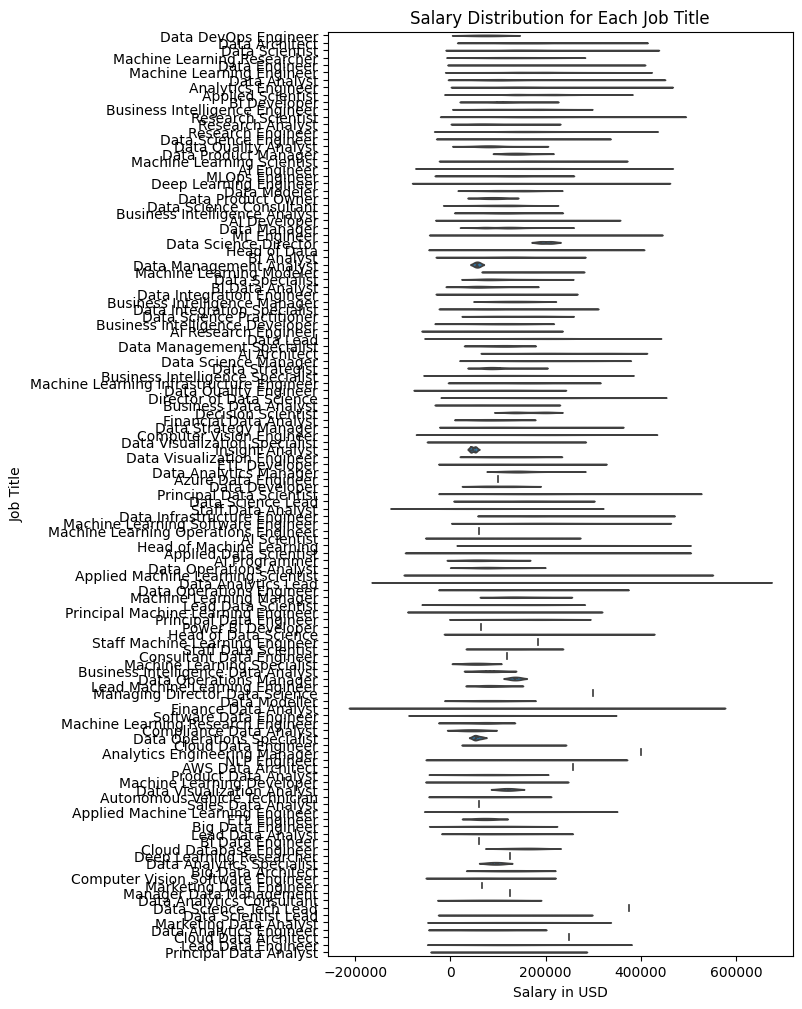

In [46]:
#violin plot,density for eah job title
plt.figure(figsize=(6, 12))
sns.violinplot(x="salary_in_usd", y="job_title", data=df, inner="quartile")
plt.xlabel("Salary in USD")
plt.ylabel("Job Title")
plt.title("Salary Distribution for Each Job Title")
plt.show()

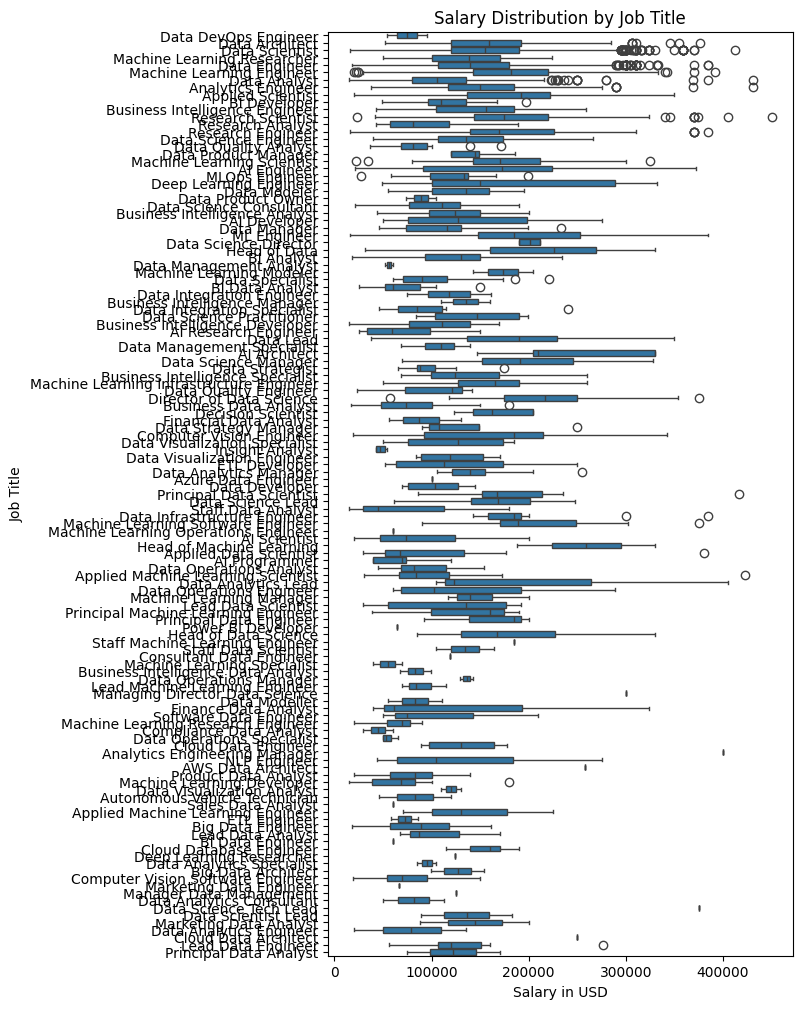

In [45]:
#boxplot
plt.figure(figsize=(6, 12))
sns.boxplot(x="salary_in_usd", y="job_title", data=df)
plt.xlabel("Salary in USD")
plt.ylabel("Job Title")
plt.title("Salary Distribution by Job Title")
plt.show()

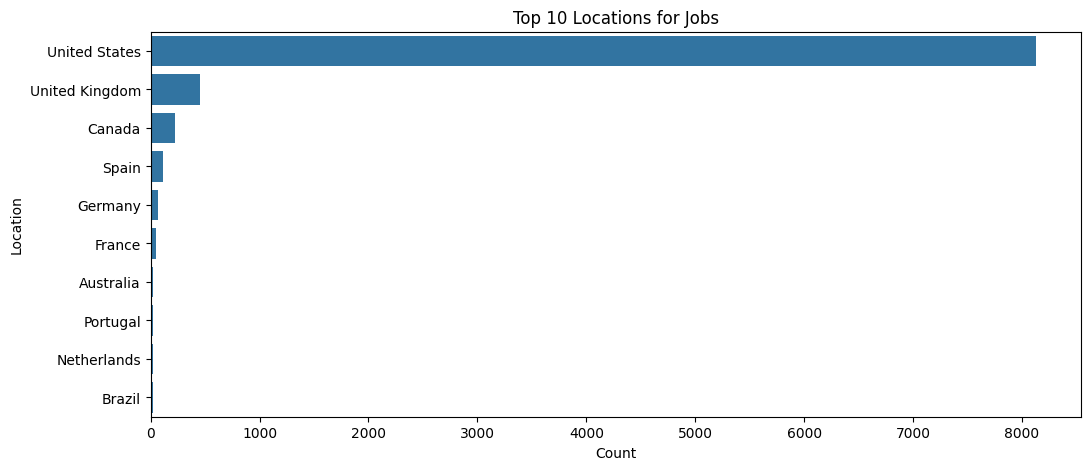

In [49]:
#no of jobs per location
plt.figure(figsize=(12, 5))
sns.countplot(y=df["company_location"], order=df["company_location"].value_counts().index[:10])
plt.title("Top 10 Locations for Jobs")
plt.xlabel("Count")
plt.ylabel("Location")
plt.show()

In [50]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Titles and labels
plt.title("Feature Correlation Heatmap")
plt.show()

ValueError: could not convert string to float: 'Data DevOps Engineer'

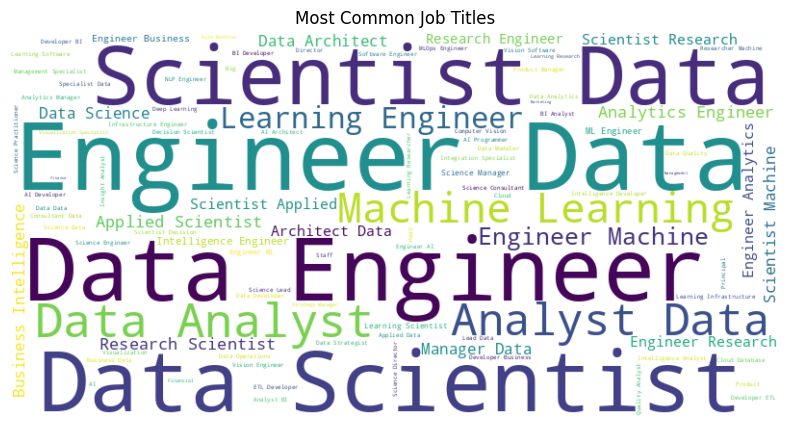

In [51]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(df["job_title"]))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Job Titles")
plt.show()